In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = 'large_data.xlsx'

f = pd.ExcelFile(filepath)

### 'content' has the sectors for each company

In [3]:
content = pd.read_excel(f, 'qual')
content

,Company,Ticker,Sector,Delisting Date,Delisting Reason
0,A G D Mining Ltd,AGZ,Basic Materials,NaT,Acquired
1,A.C.N 004 410 833 Ltd,ARI,Basic Materials,2019-04-08,Other events
2,Adbri Ltd,ABC,Basic Materials,NaT,NaN
3,AJ Lucas Group Ltd,AJL,Basic Materials,NaT,NaN
4,Alkane Resources Ltd,ALK,Basic Materials,NaT,NaN
...,...,...,...,...,...
424,Matter Technology Ltd,GNB,Utilities,NaT,Other events
425,Pacific Energy Ltd,PEA,Utilities,2019-12-04,Other events
426,Pacific Hydro Ltd,PHY,Utilities,NaT,Acquired
427,The Australian Gas Light Co,AGL,Utilities,NaT,Consolidation/Exchange


In [4]:
mcap = pd.read_excel(f, 'MCAP')
ps = pd.read_excel(f, 'PS')
pc = pd.read_excel(f, 'PC')
ebitda = pd.read_excel(f, 'EBITDA')
pb = pd.read_excel(f, 'PB')
pe = pd.read_excel(f, 'PE')
roe = pd.read_excel(f, 'roe')
nm = pd.read_excel(f, 'nm')
debt = pd.read_excel(f, 'debt')
cf = pd.read_excel(f, 'cf')

In [5]:
pb.tail(5)

,Unnamed: 0,Unnamed: 1,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,...,2022-01-31 00:00:00,2022-02-28 00:00:00,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00
424,Woodside Energy Group Ltd,WDS,4.374633,4.143616,4.651305,4.191694,4.140421,4.445577,4.645425,4.574438,...,1.264529,1.479058,1.761971,1.620219,1.567307,3.093685,3.160905,1.366465,1.197720,1.333620
425,Woolworths Group Ltd,WOW,4.015032,3.946649,4.461173,4.394456,5.029297,5.075869,5.511543,4.738605,...,30.251054,7.727815,8.113229,8.398736,7.556900,7.764091,8.182828,7.326044,6.891640,6.717063
426,Wpp Aunz Ltd,WPP,7.312327,7.676088,10.430848,10.141102,10.348063,12.748814,13.452482,8.191000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Wridgways Australia Ltd,WWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,Yowie Group Ltd,YOW,0.447843,0.552014,0.527901,0.486819,0.381267,0.396274,0.409002,0.337276,...,0.935652,0.852084,0.871119,0.793002,0.829626,0.733722,0.859962,0.755285,0.747452,0.734981


### This function does a few things: 1) renames the first 2 columns, 2) gets rid of the "names of the companies" column, 3) sets Ticker col as index, 4) Transposes the whole thing

In [6]:
def correct(y):
    y = y.rename(columns={y.columns[0]: "Group/Investment", y.columns[1]: "Ticker"})
    y = y.iloc[: , 1:]
    y = y.set_index('Ticker')
    y1 = y.T
    return y1

#### This function simply ranks each company in descending order (lower the number (P/B) the higher the greater the number (lower the rank)), across each time period

In [7]:
def rebalance(a):
    a1 = a.rank(axis=1, ascending=False, method='min')
    return a1

#### Applying the functions to the pb dataframe

In [8]:
pb1 = correct(pb)
pb2 = rebalance(pb1)

In [39]:
pb2

Ticker,AGZ,ARI,A2B,AAT,AKG,ADA,ABC,AAU,ADB,ADQ,...,WFL,WES,WFT,WBC,WZR,WDS,WOW,WPP,WWA,YOW
2000-06-30,227.0,NaN,77.0,35.0,165.0,101.0,NaN,25.0,143.0,306.0,...,13.0,68.0,NaN,80.0,261.0,40.0,45.0,20.0,NaN,286.0
2000-07-31,142.0,NaN,64.0,31.0,168.0,102.0,NaN,28.0,146.0,305.0,...,9.0,82.0,NaN,85.0,243.0,49.0,52.0,18.0,NaN,284.0
2000-08-31,171.0,NaN,71.0,38.0,159.0,104.0,NaN,26.0,145.0,305.0,...,35.0,70.0,NaN,83.0,259.0,42.0,44.0,14.0,NaN,286.0
2000-09-30,199.0,NaN,60.0,28.0,178.0,120.0,NaN,25.0,141.0,306.0,...,36.0,72.0,NaN,86.0,257.0,45.0,42.0,13.0,NaN,288.0
2000-10-31,163.0,NaN,56.0,29.0,194.0,129.0,NaN,28.0,132.0,304.0,...,33.0,62.0,NaN,75.0,268.0,45.0,35.0,12.0,NaN,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,NaN,NaN,98.0,NaN,111.0,62.0,NaN,NaN,NaN,NaN,...,25.0,21.0,NaN,129.0,92.0,44.0,14.0,NaN,NaN,152.0
2022-07-31,NaN,NaN,99.0,NaN,90.0,44.0,NaN,NaN,NaN,NaN,...,38.0,20.0,NaN,125.0,85.0,46.0,14.0,NaN,NaN,146.0
2022-08-31,NaN,NaN,81.0,NaN,99.0,51.0,NaN,NaN,NaN,NaN,...,5.0,21.0,NaN,126.0,93.0,97.0,17.0,NaN,NaN,156.0
2022-09-30,NaN,NaN,76.0,NaN,85.0,56.0,NaN,NaN,NaN,NaN,...,4.0,22.0,NaN,116.0,121.0,103.0,16.0,NaN,NaN,152.0


### Very Important info for below - the 'where' is *( 1) condition, 2) what to do with values that are FALSE)*

In [51]:
tickers = []
tickers = content['Ticker']

In [52]:
actual_returns = pd.read_csv('retty.csv') # can change to xlsx to save making index the same below

In [53]:
actual_returns1 = correct(actual_returns)
actual_returns2 = actual_returns1/100
actual_returns2.index = pb2.index

In [54]:
signal = pb2.copy()

for ticker in tickers:
    signal[ticker]= np.where(signal[ticker]<=60, -1, 1)

returns = signal.mul(actual_returns2.shift(-1), axis =0)

strategy_returns = np.sum(returns, axis=1)/len(tickers)

### !!!!!!!!! NaN's below are being considered to be greater than 60...

In [55]:
#pb2.to_csv('testest.csv')
#actual_returns3.to_csv('testest2.csv')

In [56]:
signal.head(3)

Ticker,AGZ,ARI,A2B,AAT,AKG,ADA,ABC,AAU,ADB,ADQ,...,WFL,WES,WFT,WBC,WZR,WDS,WOW,WPP,WWA,YOW
2000-06-30 00:00:00,1,1,1,-1,1,1,1,-1,1,1,...,-1,1,1,1,1,-1,-1,-1,1,1
2000-07-31 00:00:00,1,1,1,-1,1,1,1,-1,1,1,...,-1,1,1,1,1,-1,-1,-1,1,1
2000-08-31 00:00:00,1,1,1,-1,1,1,1,-1,1,1,...,-1,1,1,1,1,-1,-1,-1,1,1


In [57]:
returns.head(5)

Ticker,AGZ,ARI,A2B,AAT,AKG,ADA,ABC,AAU,ADB,ADQ,...,WFL,WES,WFT,WBC,WZR,WDS,WOW,WPP,WWA,YOW
2000-06-30 00:00:00,0.850000,0.111940,0.240566,-0.195402,0.087912,0.100000,-0.070588,0.024390,0.064854,0.111111,...,-0.733333,-0.033835,0.0,0.017925,0.208333,NaN,0.017032,-0.049746,0.178571,0.268293
2000-07-31 00:00:00,-0.162162,-0.114094,-0.049430,0.096154,0.030303,-0.065455,-0.037975,-0.068750,-0.007859,0.000000,...,0.042308,0.100000,0.0,0.031225,-0.103448,NaN,-0.130363,-0.218569,0.121212,-0.038462
2000-08-31 00:00:00,-0.193548,-0.098485,0.080000,-0.010638,-0.117647,-0.085603,0.328947,0.055556,0.000000,-0.070159,...,0.156627,-0.021578,0.0,0.007985,-0.057709,NaN,-0.003504,0.016667,0.054054,-0.020000
2000-09-30 00:00:00,0.240000,-0.226891,-0.064815,0.010526,-0.088889,-0.012766,-0.071429,0.050633,0.028689,-0.193410,...,-0.142857,0.103296,0.0,0.033255,-0.081616,NaN,-0.139680,-0.020408,0.013889,-0.183673
2000-10-31 00:00:00,-0.193548,-0.010870,-0.024735,0.086022,0.000000,0.063963,-0.098901,0.166667,0.053785,0.000000,...,-0.000000,0.106660,0.0,0.083953,-0.011364,NaN,-0.009238,-0.232000,0.000000,0.025000


In [58]:
import quantstats as qs

In [59]:
qs.extend_pandas()

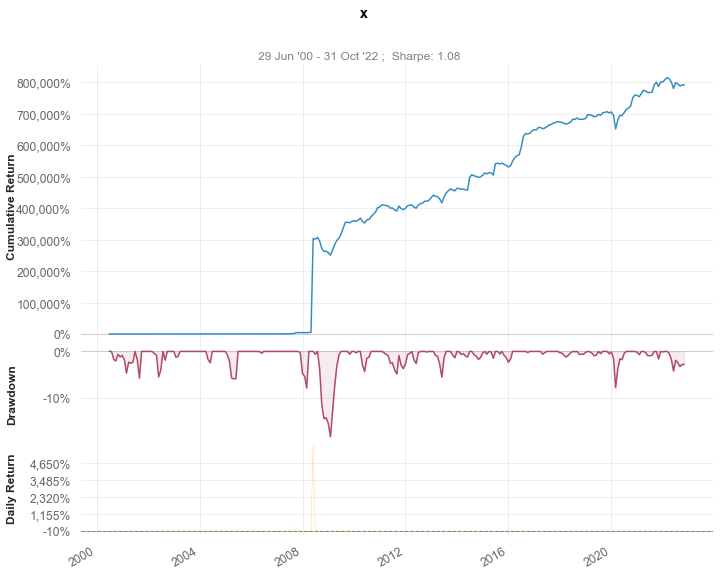

In [60]:
strategy_returns.plot_snapshot(title='x')

In [35]:
[f for f in dir(qs.stats) if f[0] != '_']

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren